1. replace incorrect entries formatting
2. Selecting data sets (400 dataset instead of 1600 cause 1600 has a severe imbalance in target class)
3. Instead Simple Imputer we choose iterative computer which is more logical
4. filled missing categorical column values using plastic fire model (Random Forest classifier)
5. Now just have some null values for some categorical column. Less than five inches each column so we simply intuitive using most frequent or mode technique.
6. The categorical columns show only two unique values that’s why wounded label encoder instead of one hurt encoding.
7. We both tested standard scalar and min-max scaler. As Tree based Model will perform same we’ll look for distance based models like SVM and found that. minmax scalar did well so we included Min Max scalar to our preprocessing pipeline
8. As the imbalance wasn’t significant still, we used SMOTE -> Which also resulted same so we do not include SMOTE in final pipeline.
Take Away 
1.	SVM did well overall
2.	Our initial thought about DNN wasn’t totally accurate as traditional ML did really well and their computational time is also quite low compared to our DNN (shown in image)
3.	However, in a broad scale DNN comes 2nd among all models (described in last text)
Future Work 
1.	Reduce features using RFE wrapper and Correlation matrix
2.	Use 1600 row dataset for validation of our findings


# Importing Libraries

In [2]:
# For Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px

# Import ML Model Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# For Model Evaluation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

# importing data

In [3]:

raw_dataset = pd.read_csv('./kidney_disease.csv')

# making csv a pandas dataframe
dataframe = pd.DataFrame(raw_dataset)

# Formating datatype

In [4]:
# setting random seeds
np.random.seed(42)

# dropping 'id' column
dataframe.drop('id', axis = 1, inplace = True)


# rename column names to make it more user-friendly
dataframe.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']


In [5]:
dataframe.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
# converting necessary columns to numerical type
dataframe['packed_cell_volume'] = pd.to_numeric(dataframe['packed_cell_volume'], errors='coerce')
dataframe['white_blood_cell_count'] = pd.to_numeric(dataframe['white_blood_cell_count'], errors='coerce')
dataframe['red_blood_cell_count'] = pd.to_numeric(dataframe['red_blood_cell_count'], errors='coerce')


# Extracting categorical and numerical columns
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'object']


In [7]:
dataframe.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [10]:
for col in cat_cols:
    print(f"Unique values in '{col}' BEFORE encoding:")
    print(dataframe[col].unique())
    print()

Unique values in 'red_blood_cells' BEFORE encoding:
[nan 'normal' 'abnormal']

Unique values in 'pus_cell' BEFORE encoding:
['normal' 'abnormal' nan]

Unique values in 'pus_cell_clumps' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'bacteria' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'hypertension' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'diabetes_mellitus' BEFORE encoding:
['yes' 'no' ' yes' '\tno' '\tyes' nan]

Unique values in 'coronary_artery_disease' BEFORE encoding:
['no' 'yes' '\tno' nan]

Unique values in 'appetite' BEFORE encoding:
['good' 'poor' nan]

Unique values in 'peda_edema' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'aanemia' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'class' BEFORE encoding:
['ckd' 'ckd\t' 'notckd']



In [11]:
# replace incorrect values
dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
dataframe['coronary_artery_disease'] = dataframe['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
dataframe['class'] = dataframe['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})



<ipython-input-11-1580516140>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [12]:
for col in cat_cols:
    print(f"Unique values in '{col}' BEFORE encoding:")
    print(dataframe[col].unique())
    print()

Unique values in 'red_blood_cells' BEFORE encoding:
[nan 'normal' 'abnormal']

Unique values in 'pus_cell' BEFORE encoding:
['normal' 'abnormal' nan]

Unique values in 'pus_cell_clumps' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'bacteria' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'hypertension' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'diabetes_mellitus' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'coronary_artery_disease' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'appetite' BEFORE encoding:
['good' 'poor' nan]

Unique values in 'peda_edema' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'aanemia' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'class' BEFORE encoding:
['ckd' 'not ckd']



In [13]:
dataframe.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [14]:
dataframe.tail()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,not ckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,not ckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,not ckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,not ckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,not ckd


In [15]:
# replacing 'ckd' with 0 and 'not ckd' with 1
dataframe['class'] = dataframe['class'].map({'ckd': 0, 'not ckd': 1})

# # making 'class' column into a numerical column
# dataframe['class'] = pd.to_numeric(dataframe['class'], errors='coerce')

In [16]:
for col in cat_cols:
    print(f"Unique values in '{col}' BEFORE encoding:")
    print(dataframe[col].unique())
    print()

Unique values in 'red_blood_cells' BEFORE encoding:
[nan 'normal' 'abnormal']

Unique values in 'pus_cell' BEFORE encoding:
['normal' 'abnormal' nan]

Unique values in 'pus_cell_clumps' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'bacteria' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'hypertension' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'diabetes_mellitus' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'coronary_artery_disease' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'appetite' BEFORE encoding:
['good' 'poor' nan]

Unique values in 'peda_edema' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'aanemia' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'class' BEFORE encoding:
[0 1]



In [17]:
# making 'class' column into a numerical column
dataframe['class'] = pd.to_numeric(dataframe['class'], errors='coerce')

In [18]:
for col in cat_cols:
    print(f"Unique values in '{col}' BEFORE encoding:")
    print(dataframe[col].unique())
    print()

Unique values in 'red_blood_cells' BEFORE encoding:
[nan 'normal' 'abnormal']

Unique values in 'pus_cell' BEFORE encoding:
['normal' 'abnormal' nan]

Unique values in 'pus_cell_clumps' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'bacteria' BEFORE encoding:
['notpresent' 'present' nan]

Unique values in 'hypertension' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'diabetes_mellitus' BEFORE encoding:
['yes' 'no' nan]

Unique values in 'coronary_artery_disease' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'appetite' BEFORE encoding:
['good' 'poor' nan]

Unique values in 'peda_edema' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'aanemia' BEFORE encoding:
['no' 'yes' nan]

Unique values in 'class' BEFORE encoding:
[0 1]



In [19]:
dataframe.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


Imbalance Check !!

In [20]:
print(dataframe['class'].value_counts())

class
0    250
1    150
Name: count, dtype: int64


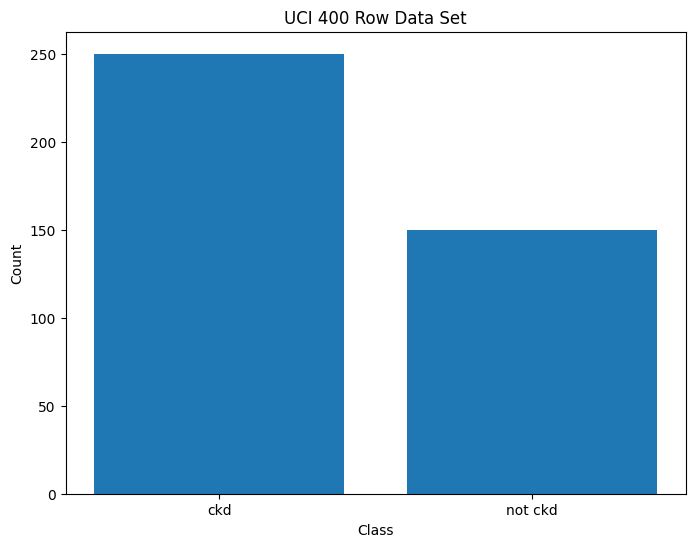

In [21]:
# prompt: print(dataframe['class'].value_counts())
# vizualize it using a bar chart
import matplotlib.pyplot as plt
counts = dataframe['class'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ['ckd', 'not ckd'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('UCI 400 Row Data Set')
plt.show()

In [22]:
dataframe.shape

(400, 25)

Another Data Set !!!

In [23]:

r = pd.read_csv('/content/Chronic_Kidney_Dsease_data.csv')

# making csv a pandas dataframe
d = pd.DataFrame(r)

In [24]:
d.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [25]:
print(d['Diagnosis'].value_counts())

Diagnosis
1    1524
0     135
Name: count, dtype: int64


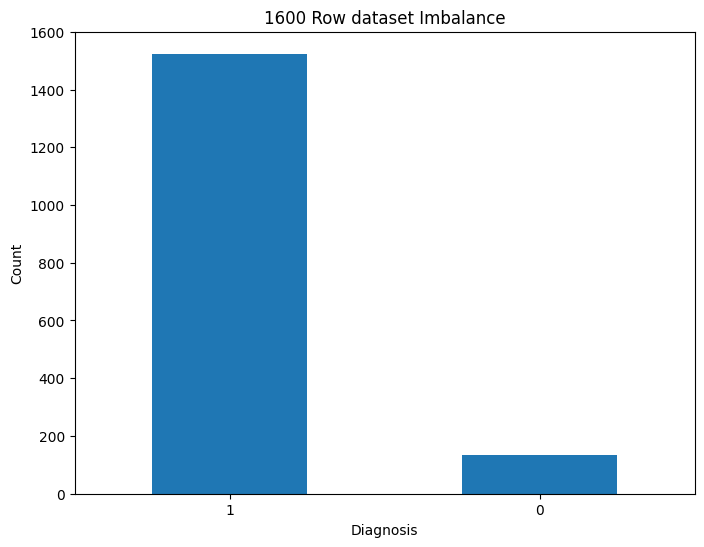

In [26]:
# prompt: print(d['Diagnosis'].value_counts())
# vizualize it using barchart

import matplotlib.pyplot as plt
diagnosis_counts = d['Diagnosis'].value_counts()
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('1600 Row dataset Imbalance')
plt.xticks(rotation=0)
plt.show()

So We Choose 400 Row Data Set for preprocessing !!

In [27]:
dataframe.isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [28]:
dataframe.duplicated().sum()

np.int64(0)

# impute

Numericals

KNN

In [29]:
# from sklearn.impute import KNNImputer

# # Define numerical columns with missing values
# num_cols = ['age', 'blood_pressure', 'blood_glucose_random', 'blood_urea',
#             'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
#             'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

# # Initialize the KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)  # You can change k as needed

# # Apply imputer
# dataframe[num_cols] = knn_imputer.fit_transform(dataframe[num_cols])


Iterative imputer using Regression Model

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Define numerical columns
num_cols = ['age', 'blood_pressure','specific_gravity','albumin','sugar', 'blood_glucose_random', 'blood_urea',
            'serum_creatinine', 'sodium', 'potassium', 'haemoglobin',
            'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

# Initialize IterativeImputer with RandomForestRegressor as estimator
iter_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42),
                                max_iter=10,
                                random_state=42)

# Fit and transform the numerical columns
dataframe[num_cols] = iter_imputer.fit_transform(dataframe[num_cols])


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [32]:
dataframe.head(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.20,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,143.2,...,38.0,6000.0,4.43,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,3.43,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.90,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.60,no,no,no,good,no,no,0


In [33]:
dataframe.isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,0


For Categorical Columns with Large Null values :

We did
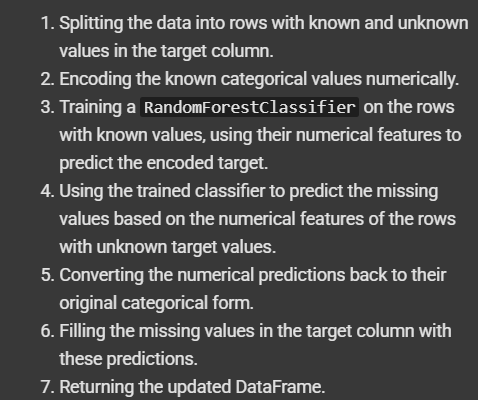

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def fill_missing_with_classifier(df, target_col):
    df = df.copy()

    # 1. Separate rows with known and unknown target values
    df_known = df[df[target_col].notnull()]
    df_unknown = df[df[target_col].isnull()]

    # 2. Encode target column
    le = LabelEncoder()
    df_known[target_col + '_encoded'] = le.fit_transform(df_known[target_col])

    # 3. Drop other rows with missing values in important features
    features = df.columns.drop([target_col])
    X_train = df_known[features].select_dtypes(include=['number']).dropna()
    y_train = df_known.loc[X_train.index, target_col + '_encoded']

    # 4. Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # 5. Prepare test data
    X_test = df_unknown[features].select_dtypes(include=['number']).dropna()

    # 6. Predict and fill
    y_pred = clf.predict(X_test)
    df.loc[X_test.index, target_col] = le.inverse_transform(y_pred)

    return df


In [35]:
# Fill missing 'red_blood_cells'
dataframe = fill_missing_with_classifier(dataframe, target_col='red_blood_cells')

# Fill missing 'pus_cell'
dataframe = fill_missing_with_classifier(dataframe, target_col='pus_cell')


<ipython-input-34-2519123268>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known[target_col + '_encoded'] = le.fit_transform(df_known[target_col])
<ipython-input-34-2519123268>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_known[target_col + '_encoded'] = le.fit_transform(df_known[target_col])


In [36]:
dataframe.isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,4
bacteria,4
blood_glucose_random,0


In [37]:
'''
pus_cell_clumps	4
bacteria	4
hypertension	2
diabetes_mellitus	2
coronary_artery_disease	2
appetite	1
peda_edema	1
aanemia	1
'''

'\npus_cell_clumps\t4\nbacteria\t4\nhypertension\t2\ndiabetes_mellitus\t2\ncoronary_artery_disease\t2\nappetite\t1\npeda_edema\t1\naanemia\t1\n'

In [38]:
from sklearn.impute import SimpleImputer # Import SimpleImputer

cat_cols = ['pus_cell_clumps', 'bacteria',
            'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
            'appetite', 'peda_edema', 'aanemia']

imputer_cat = SimpleImputer(strategy='most_frequent')
dataframe[cat_cols] = imputer_cat.fit_transform(dataframe[cat_cols])

In [39]:
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'object']

In [40]:
dataframe.isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
blood_glucose_random,0


In [41]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [42]:
for col in cat_cols:
    print(f"Unique values in '{col}' BEFORE encoding:")
    print(dataframe[col].unique())
    print()

Unique values in 'red_blood_cells' BEFORE encoding:
['normal' 'abnormal']

Unique values in 'pus_cell' BEFORE encoding:
['normal' 'abnormal']

Unique values in 'pus_cell_clumps' BEFORE encoding:
['notpresent' 'present']

Unique values in 'bacteria' BEFORE encoding:
['notpresent' 'present']

Unique values in 'hypertension' BEFORE encoding:
['yes' 'no']

Unique values in 'diabetes_mellitus' BEFORE encoding:
['yes' 'no']

Unique values in 'coronary_artery_disease' BEFORE encoding:
['no' 'yes']

Unique values in 'appetite' BEFORE encoding:
['good' 'poor']

Unique values in 'peda_edema' BEFORE encoding:
['no' 'yes']

Unique values in 'aanemia' BEFORE encoding:
['no' 'yes']



In [43]:
dataframe.shape

(400, 25)

# Feature Encoding

In [44]:
le = LabelEncoder()

for col in cat_cols:
    dataframe[col] = le.fit_transform(dataframe[col])


dataframe.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.20,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,143.2,...,38.0,6000.0,4.43,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.43,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.90,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.60,0,0,0,0,0,0,0


In [45]:
print(dataframe[cat_cols].dtypes)


red_blood_cells            int64
pus_cell                   int64
pus_cell_clumps            int64
bacteria                   int64
hypertension               int64
diabetes_mellitus          int64
coronary_artery_disease    int64
appetite                   int64
peda_edema                 int64
aanemia                    int64
dtype: object


In [46]:
dataframe.shape

(400, 25)

In [47]:
# prompt: save the daraframe

dataframe.to_csv('processed_dataframe.csv', index=False)

# Splitting  Dataset

All in One

Standard Scaler !!

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

# 1. Split Data
X = dataframe.drop('class', axis=1)
y = dataframe['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# 4. Train, Predict & Evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{'='*40}\n{name}\n{'='*40}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


SVM
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.97      0.97      0.97        30

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Naive Bayes
Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy               

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


Decision Tree
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


AdaBoost
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.97      0.93      0.95        30

    accuracy              

Min max scaler !!

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

# 1. Separate features and target
X = dataframe.drop('class', axis=1)
y = dataframe['class']

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# 5. Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{'='*40}\n{name}\n{'='*40}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


SVM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Naive Bayes
Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


Decision Tree
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


AdaBoost
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.97      0.93      0.95        30

    accuracy              

Test and Validation Accuracy


Random Forest
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


SVM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Naive Bayes
Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


Decision Tree
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


AdaBoost
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy               

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:23:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

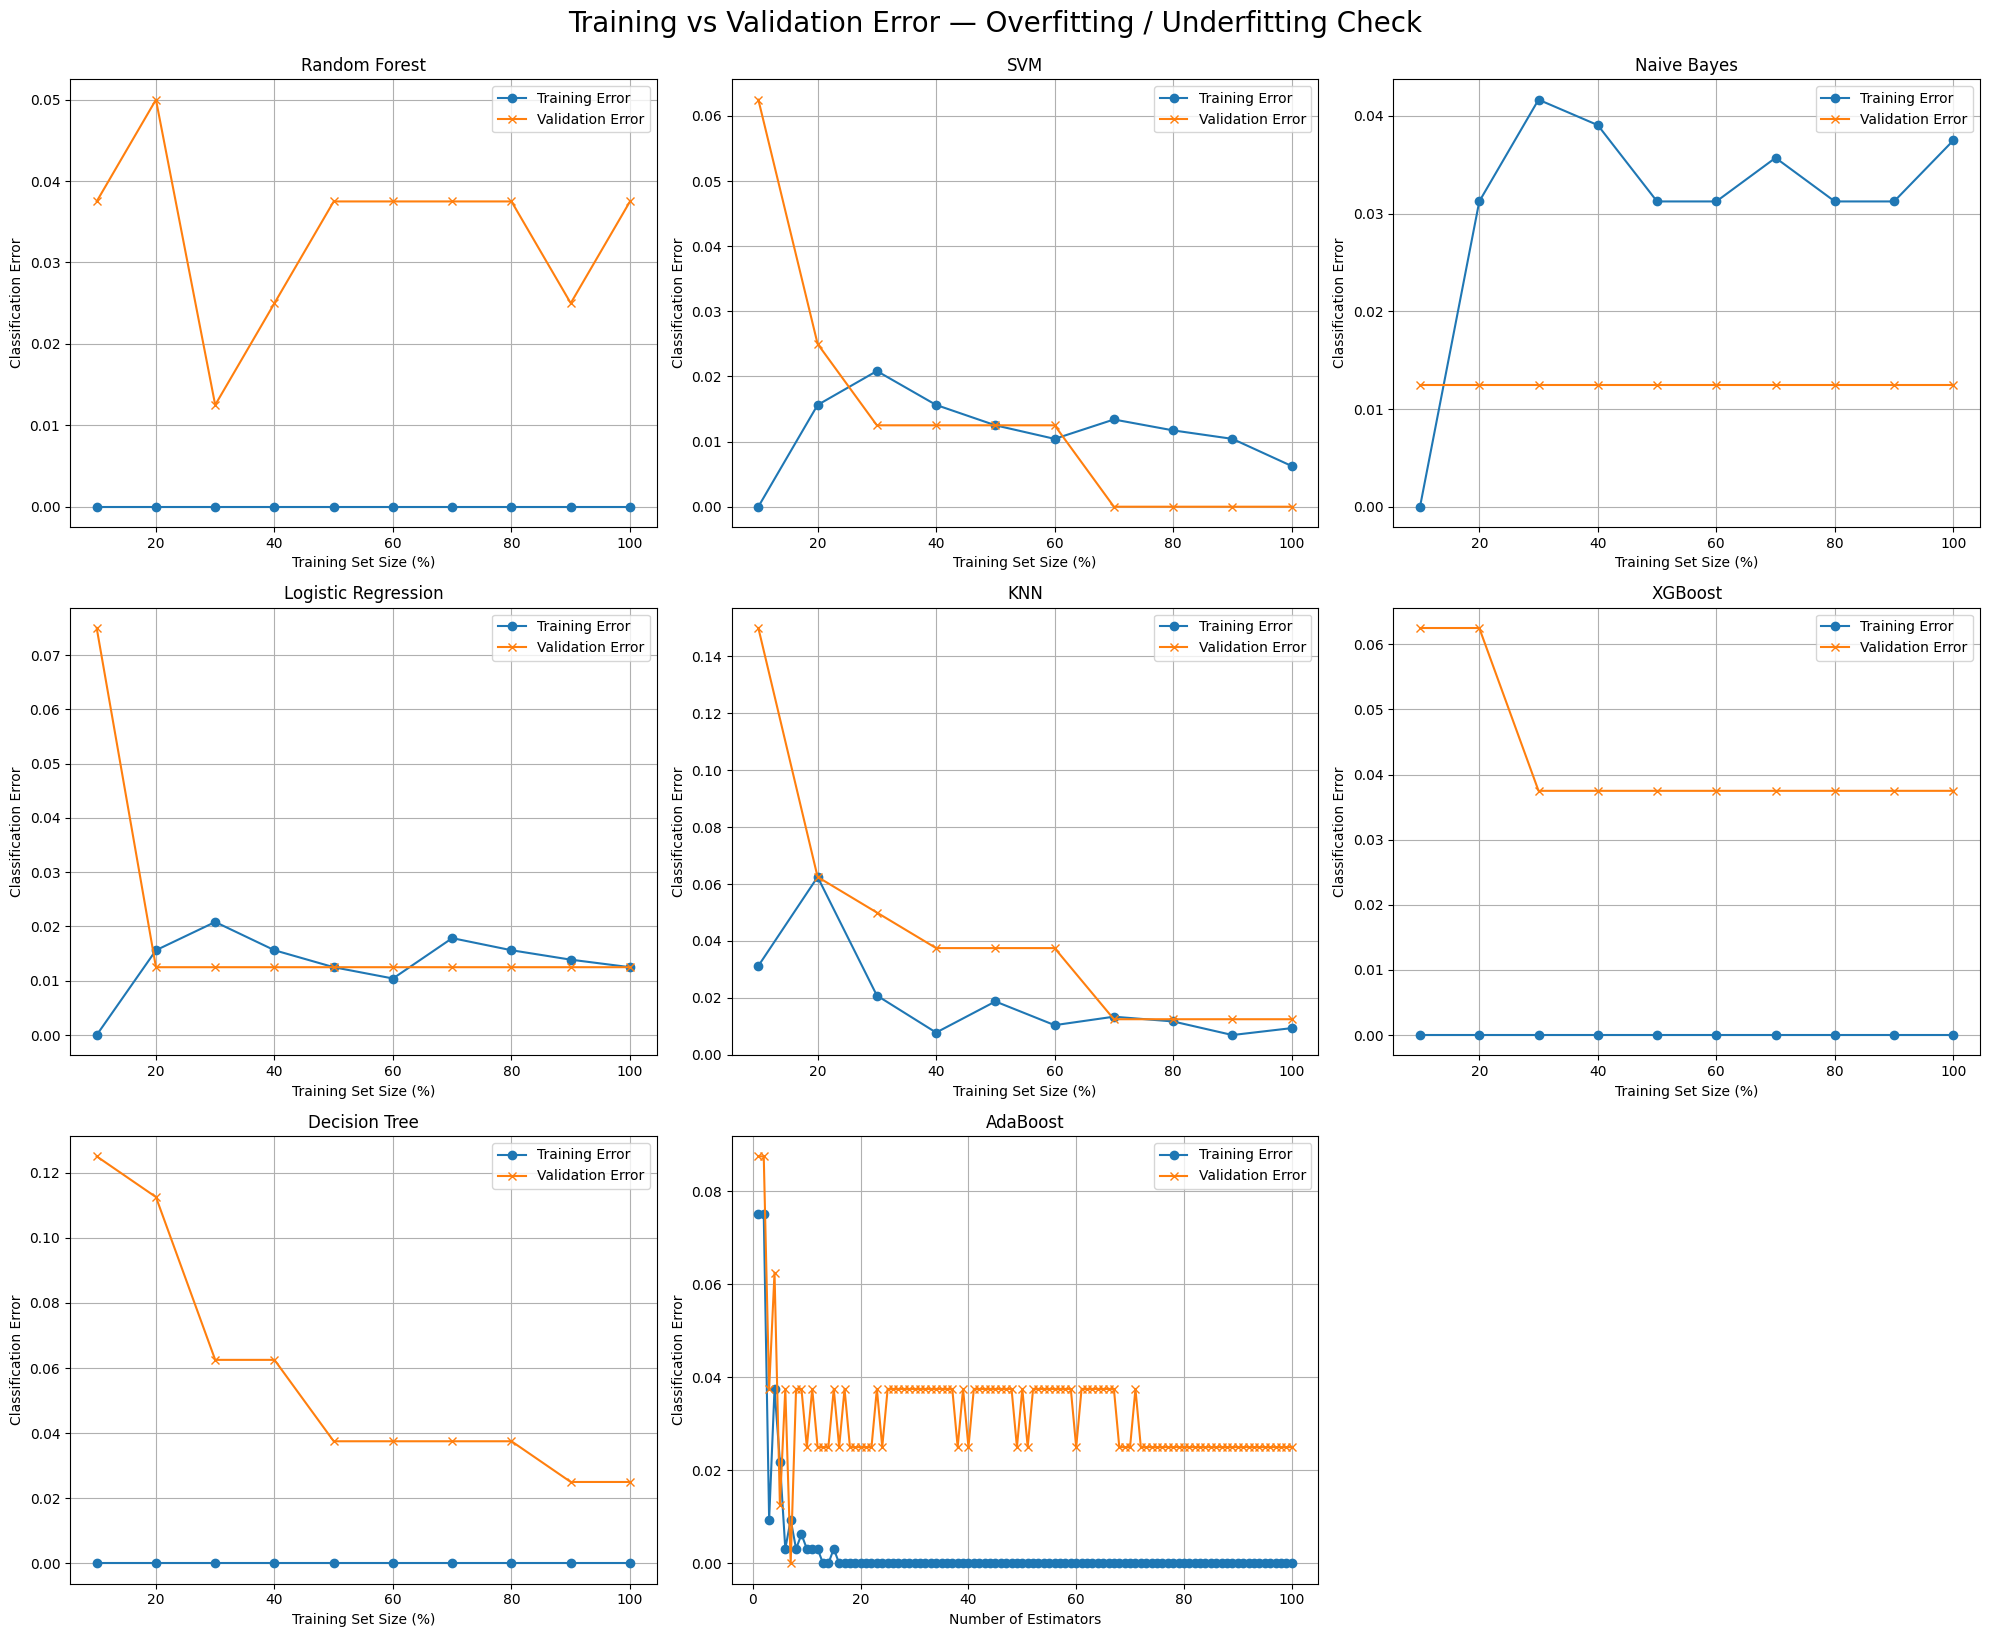

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, zero_one_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# 1. Separate features and target
X = dataframe.drop('class', axis=1)
y = dataframe['class']

# 2. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100)
}

# 5. Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{'='*40}\n{name}\n{'='*40}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. Visualize overfitting/underfitting using training vs validation error
def plot_model_overfit_underfit(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(20, 16))

    for i, (name, model) in enumerate(models.items(), 1):
        train_errors = []
        val_errors = []

        if name == "AdaBoost":
            model.fit(X_train, y_train)
            for y_pred_train in model.staged_predict(X_train):
                train_errors.append(zero_one_loss(y_train, y_pred_train))
            for y_pred_test in model.staged_predict(X_test):
                val_errors.append(zero_one_loss(y_test, y_pred_test))
            x_axis = range(1, model.n_estimators + 1)
        else:
            train_sizes = np.linspace(0.1, 1.0, 10)
            for frac in train_sizes:
                n = int(len(X_train) * frac)
                model.fit(X_train[:n], y_train[:n])
                y_train_pred = model.predict(X_train[:n])
                y_test_pred = model.predict(X_test)
                train_errors.append(zero_one_loss(y_train[:n], y_train_pred))
                val_errors.append(zero_one_loss(y_test, y_test_pred))
            x_axis = (train_sizes * 100).astype(int)

        plt.subplot(3, 3, i)
        plt.plot(x_axis, train_errors, label='Training Error', marker='o')
        plt.plot(x_axis, val_errors, label='Validation Error', marker='x')
        plt.xlabel('Training Set Size (%)' if name != 'AdaBoost' else 'Number of Estimators')
        plt.ylabel('Classification Error')
        plt.title(f"{name}")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle("Training vs Validation Error — Overfitting / Underfitting Check", fontsize=20, y=1.02)
    plt.show()

# 7. Call the visualization
plot_model_overfit_underfit(X_train_scaled, y_train, X_test_scaled, y_test)


SMOTE

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# 1. Separate features and target
X = dataframe.drop('class', axis=1)
y = dataframe['class']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 5. Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# 6. Train and evaluate
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)

    print(f"\n{'='*40}\n{name}\n{'='*40}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Random Forest
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


SVM
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


Naive Bayes
Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.9625
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80


Decision Tree
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80


AdaBoost
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy               

In [52]:
y.value_counts()
y_train_balanced.value_counts()

,count
class,
1,200
0,200


# Training Models

In [53]:
# Random Forest
# SVM
# Naive Bayes
# Logistic Regression
# KNN
# XGBoost
# Decision Tree
# AdaBoost

Plotting

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np


In [55]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [56]:
from sklearn.model_selection import StratifiedKFold

def tune_random_forest(X_train, y_train):
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
    rf = RandomForestClassifier(random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    rand_search = RandomizedSearchCV(
        rf, param_distributions=param_dist,
        n_iter=20, scoring='accuracy',
        cv=cv, verbose=1, random_state=42, n_jobs=-1
    )
    rand_search.fit(X_train, y_train)
    print(f"Best params: {rand_search.best_params_}")
    print(f"Best CV Accuracy: {rand_search.best_score_:.4f}")
    return rand_search.best_estimator_


=== Training Random Forest WITHOUT SMOTE ===
Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



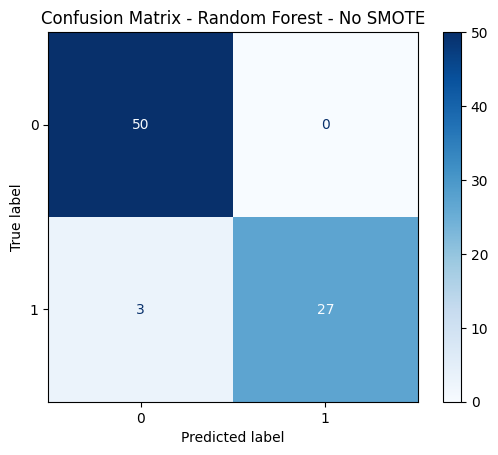

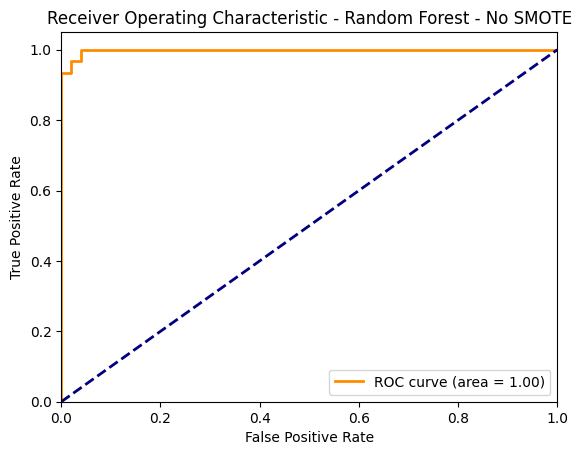

=== Training Random Forest WITH SMOTE ===
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



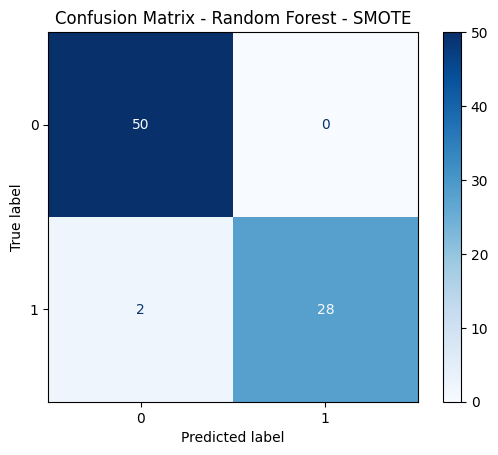

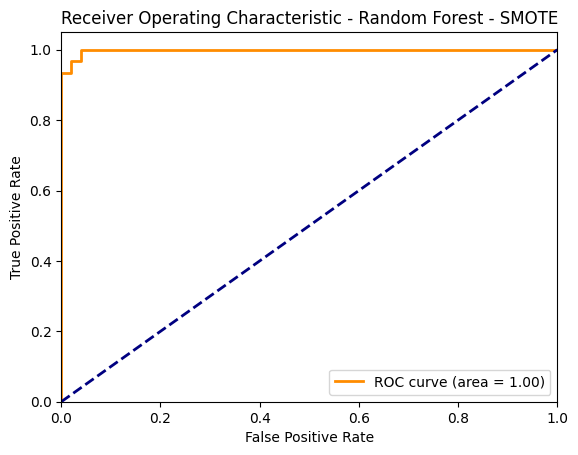

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from imblearn.over_sampling import SMOTE

# Prepare data
X = dataframe.drop('class', axis=1)
y = dataframe['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without SMOTE
print("=== Training Random Forest WITHOUT SMOTE ===")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "Random Forest - No SMOTE")
plot_roc_curve(y_test, y_proba, "Random Forest - No SMOTE")

# Hyperparameter tuning on non-SMOTE data (optional)
# rf_model = tune_random_forest(X_train_scaled, y_train)

# With SMOTE
print("=== Training Random Forest WITH SMOTE ===")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_model_smote.predict(X_test_scaled)
y_proba_smote = rf_model_smote.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
plot_confusion_matrix(y_test, y_pred_smote, "Random Forest - SMOTE")
plot_roc_curve(y_test, y_proba_smote, "Random Forest - SMOTE")

# Optional: tune with SMOTE data as well
# rf_model_smote = tune_random_forest(X_train_smote, y_train_smote)


All plot in One

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                  Model  Accuracy       AUC  SMOTE
1                   SVM    1.0000  1.000000  False
2           Naive Bayes    0.9875  0.990000  False
3   Logistic Regression    0.9875  1.000000  False
4                   KNN    0.9875  0.999667  False
6         Decision Tree    0.9750  0.966667  False
0         Random Forest    0.9625  0.998000  False
5               XGBoost    0.9625  0.997333  False
7              AdaBoost    0.9625  0.998667  False
9                   SVM    1.0000  1.000000   True
10          Naive Bayes    0.9875  0.990000   True
11  Logistic Regression    0.9875  0.999333   True
12                  KNN    0.9875  1.000000   True
8         Random Forest    0.9750  0.998000   True
14        Decision Tree    0.9750  0.966667   True
15             AdaBoost    0.9750  0.998667   True
13              XGBoost    0.9625  0.998000   True


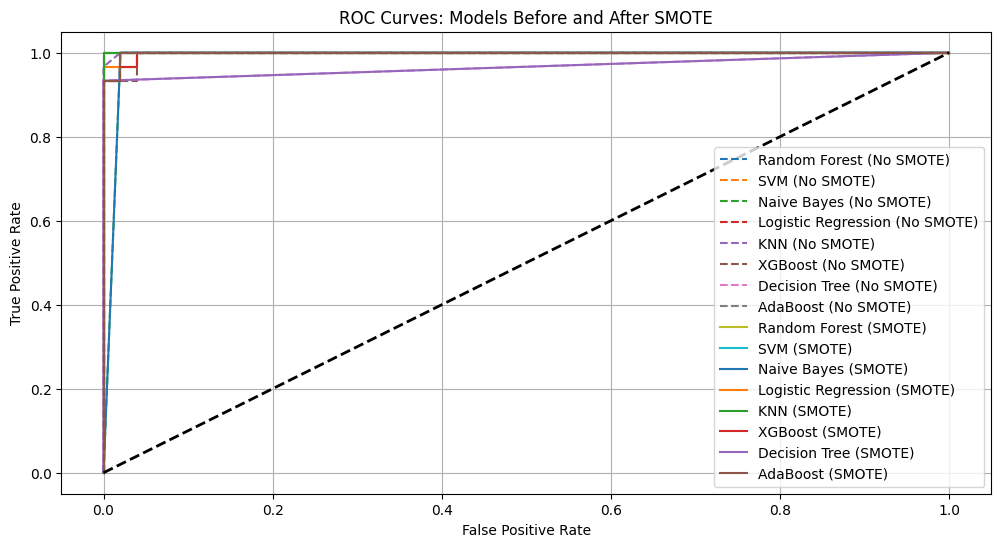

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models to evaluate
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

def evaluate_models(X_train, y_train, X_test, y_test, use_smote=False):
    """
    Train, predict and evaluate all models.
    If use_smote=True, apply SMOTE to training data before training.

    Returns:
        results_df : pd.DataFrame with accuracy and AUC scores
        roc_data : dict {model_name: (fpr, tpr, auc)}
    """
    results = []
    roc_data = {}

    # Scale data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply SMOTE if requested
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Get predicted probabilities for ROC
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:,1]
        else:
            # For models without predict_proba, use decision_function output scaled to (0,1)
            y_scores = model.decision_function(X_test_scaled)
            y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())

        acc = accuracy_score(y_test, y_pred)
        roc_auc = auc(*roc_curve(y_test, y_proba)[:2])

        results.append({
            "Model": name,
            "Accuracy": acc,
            "AUC": roc_auc,
            "SMOTE": use_smote
        })
        roc_data[name] = roc_curve(y_test, y_proba)

    results_df = pd.DataFrame(results)
    return results_df, roc_data


def plot_all_roc_curves(roc_data_before, roc_data_after):
    plt.figure(figsize=(12, 6))

    for name, (fpr, tpr, _) in roc_data_before.items():
        plt.plot(fpr, tpr, label=f"{name} (No SMOTE)", linestyle='--')

    for name, (fpr, tpr, _) in roc_data_after.items():
        plt.plot(fpr, tpr, label=f"{name} (SMOTE)", linestyle='-')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves: Models Before and After SMOTE")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# --- USAGE ---

# Prepare your features and target
X = dataframe.drop('class', axis=1)
y = dataframe['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Evaluate without SMOTE
results_no_smote, roc_no_smote = evaluate_models(X_train, y_train, X_test, y_test, use_smote=False)

# Evaluate with SMOTE
results_smote, roc_smote = evaluate_models(X_train, y_train, X_test, y_test, use_smote=True)

# Combine results
results_all = pd.concat([results_no_smote, results_smote], ignore_index=True)

# Show results table
print(results_all.sort_values(['SMOTE', 'Accuracy'], ascending=[True, False]))

# Plot all ROC curves together
plot_all_roc_curves(roc_no_smote, roc_smote)


plot individual mode training and validation error

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def plot_train_val_error_models(X_train, y_train, X_val, y_val):
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100)
    }

    plt.figure(figsize=(18, 14))

    for i, (name, model) in enumerate(models.items(), 1):
        train_errors = []
        val_errors = []

        if name == 'AdaBoost':
            # AdaBoost supports staged_predict
            model.fit(X_train, y_train)
            for y_pred_train in model.staged_predict(X_train):
                train_errors.append(zero_one_loss(y_train, y_pred_train))
            for y_pred_val in model.staged_predict(X_val):
                val_errors.append(zero_one_loss(y_val, y_pred_val))
            x_axis = range(1, model.n_estimators + 1)

        else:
            # For other models, manual learning curve with increasing training set sizes
            train_sizes = np.linspace(0.1, 1.0, 10)
            for frac in train_sizes:
                n_samples = int(len(X_train) * frac)
                model.fit(X_train[:n_samples], y_train[:n_samples])
                y_train_pred = model.predict(X_train[:n_samples])
                y_val_pred = model.predict(X_val)

                train_errors.append(zero_one_loss(y_train[:n_samples], y_train_pred))
                val_errors.append(zero_one_loss(y_val, y_val_pred))

            x_axis = (train_sizes * 100).astype(int)

        plt.subplot(3, 3, i)
        plt.plot(x_axis, train_errors, label='Training Error')
        plt.plot(x_axis, val_errors, label='Validation Error')
        plt.xlabel('Number of Estimators' if name == 'AdaBoost' else 'Training Set Size (%)')
        plt.ylabel('Classification Error')
        plt.title(f'{name} Training vs Validation Error')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()


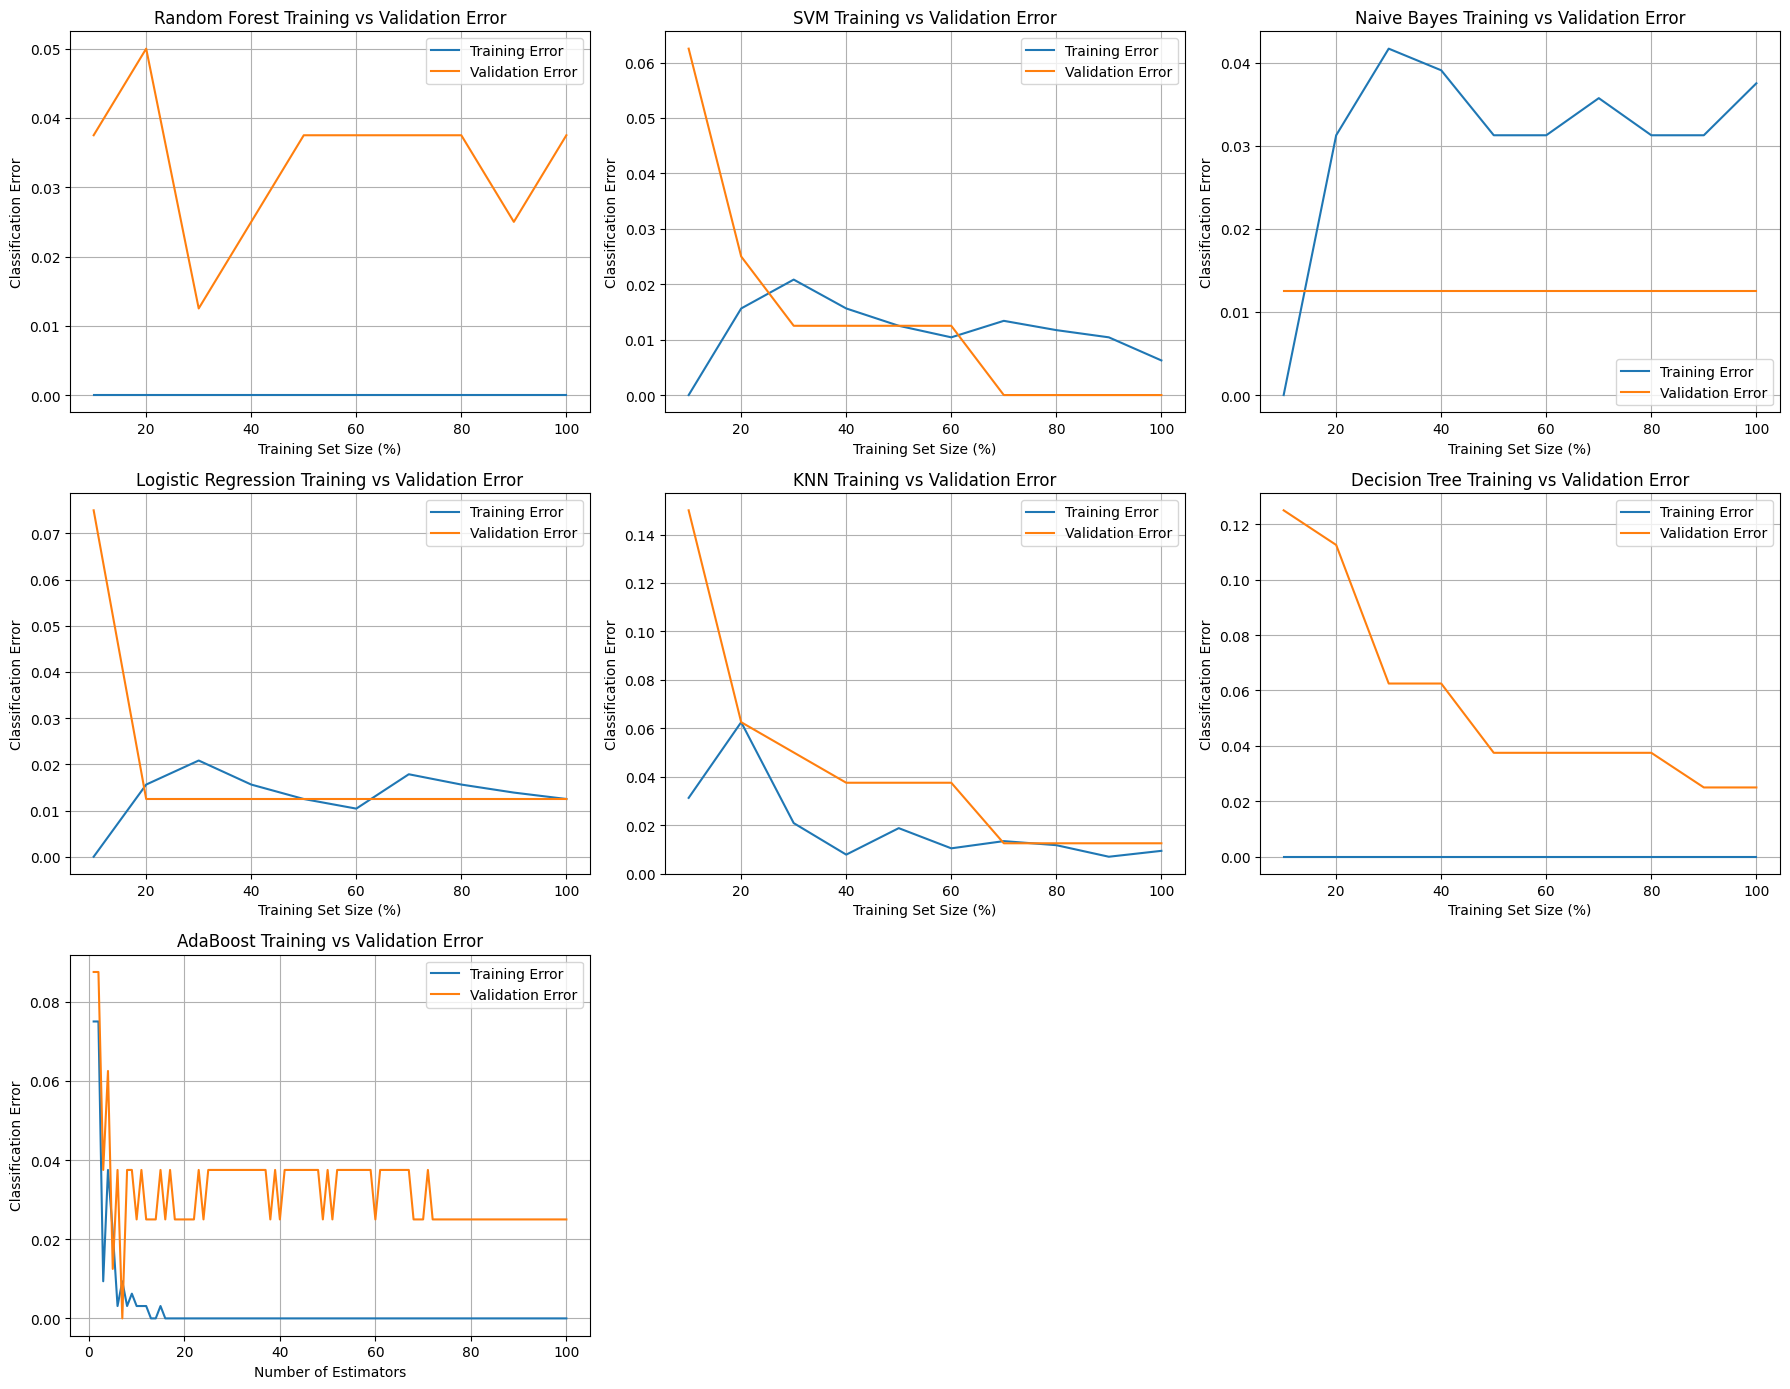

In [60]:
plot_train_val_error_models(X_train_scaled, y_train, X_test_scaled, y_test)


K-fold

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def plot_train_val_error_models_kfold(X, y, n_splits=5):
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100)
    }

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    plt.figure(figsize=(18, 14))

    for i, (name, model) in enumerate(models.items(), 1):
        train_errors_all = []
        val_errors_all = []

        if name == 'AdaBoost':
            # Use fixed estimator count for AdaBoost
            train_errors_all = np.zeros((n_splits, model.n_estimators))
            val_errors_all = np.zeros((n_splits, model.n_estimators))

            for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
                model.fit(X[train_idx], y[train_idx])

                for j, y_pred_train in enumerate(model.staged_predict(X[train_idx])):
                    train_errors_all[fold, j] = zero_one_loss(y[train_idx], y_pred_train)

                for j, y_pred_val in enumerate(model.staged_predict(X[val_idx])):
                    val_errors_all[fold, j] = zero_one_loss(y[val_idx], y_pred_val)

            train_errors = np.mean(train_errors_all, axis=0)
            val_errors = np.mean(val_errors_all, axis=0)
            x_axis = range(1, model.n_estimators + 1)

        else:
            train_sizes = np.linspace(0.1, 1.0, 10)
            train_errors_all = np.zeros((n_splits, len(train_sizes)))
            val_errors_all = np.zeros((n_splits, len(train_sizes)))

            for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
                X_train, X_val = X[train_idx], X[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]

                for j, frac in enumerate(train_sizes):
                    n_samples = max(2, int(len(X_train) * frac))

                    # Check if the training subset has more than one class
                    if len(np.unique(y_train[:n_samples])) < 2:
                        # Skip this training size if only one class is present
                        train_errors_all[fold, j] = np.nan  # Use NaN to indicate skipped value
                        val_errors_all[fold, j] = np.nan   # Use NaN to indicate skipped value
                        continue # Move to the next iteration (next training size)

                    model.fit(X_train[:n_samples], y_train[:n_samples])

                    y_train_pred = model.predict(X_train[:n_samples])
                    y_val_pred = model.predict(X_val)

                    train_errors_all[fold, j] = zero_one_loss(y_train[:n_samples], y_train_pred)
                    val_errors_all[fold, j] = zero_one_loss(y_val, y_val_pred)

            # Calculate mean errors, ignoring NaN values
            train_errors = np.nanmean(train_errors_all, axis=0)
            val_errors = np.nanmean(val_errors_all, axis=0)
            x_axis = (train_sizes * 100).astype(int)

        plt.subplot(3, 3, i)
        plt.plot(x_axis, train_errors, label='Training Error')
        plt.plot(x_axis, val_errors, label='Validation Error')
        plt.xlabel('Number of Estimators' if name == 'AdaBoost' else 'Training Set Size (%)')
        plt.ylabel('Classification Error')
        plt.title(f'{name} Training vs Validation Error (KFold)')
        plt.legend()
        plt.grid(True)

    plt.suptitle("Training vs Validation Error with K-Fold Cross Validation", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

<ipython-input-61-2285567084>:77: RuntimeWarning: Mean of empty slice
  train_errors = np.nanmean(train_errors_all, axis=0)
<ipython-input-61-2285567084>:78: RuntimeWarning: Mean of empty slice
  val_errors = np.nanmean(val_errors_all, axis=0)
<ipython-input-61-2285567084>:77: RuntimeWarning: Mean of empty slice
  train_errors = np.nanmean(train_errors_all, axis=0)
<ipython-input-61-2285567084>:78: RuntimeWarning: Mean of empty slice
  val_errors = np.nanmean(val_errors_all, axis=0)
<ipython-input-61-2285567084>:77: RuntimeWarning: Mean of empty slice
  train_errors = np.nanmean(train_errors_all, axis=0)
<ipython-input-61-2285567084>:78: RuntimeWarning: Mean of empty slice
  val_errors = np.nanmean(val_errors_all, axis=0)
<ipython-input-61-2285567084>:77: RuntimeWarning: Mean of empty slice
  train_errors = np.nanmean(train_errors_all, axis=0)
<ipython-input-61-2285567084>:78: RuntimeWarning: Mean of empty slice
  val_errors = np.nanmean(val_errors_all, axis=0)
<ipython-input-61-228556

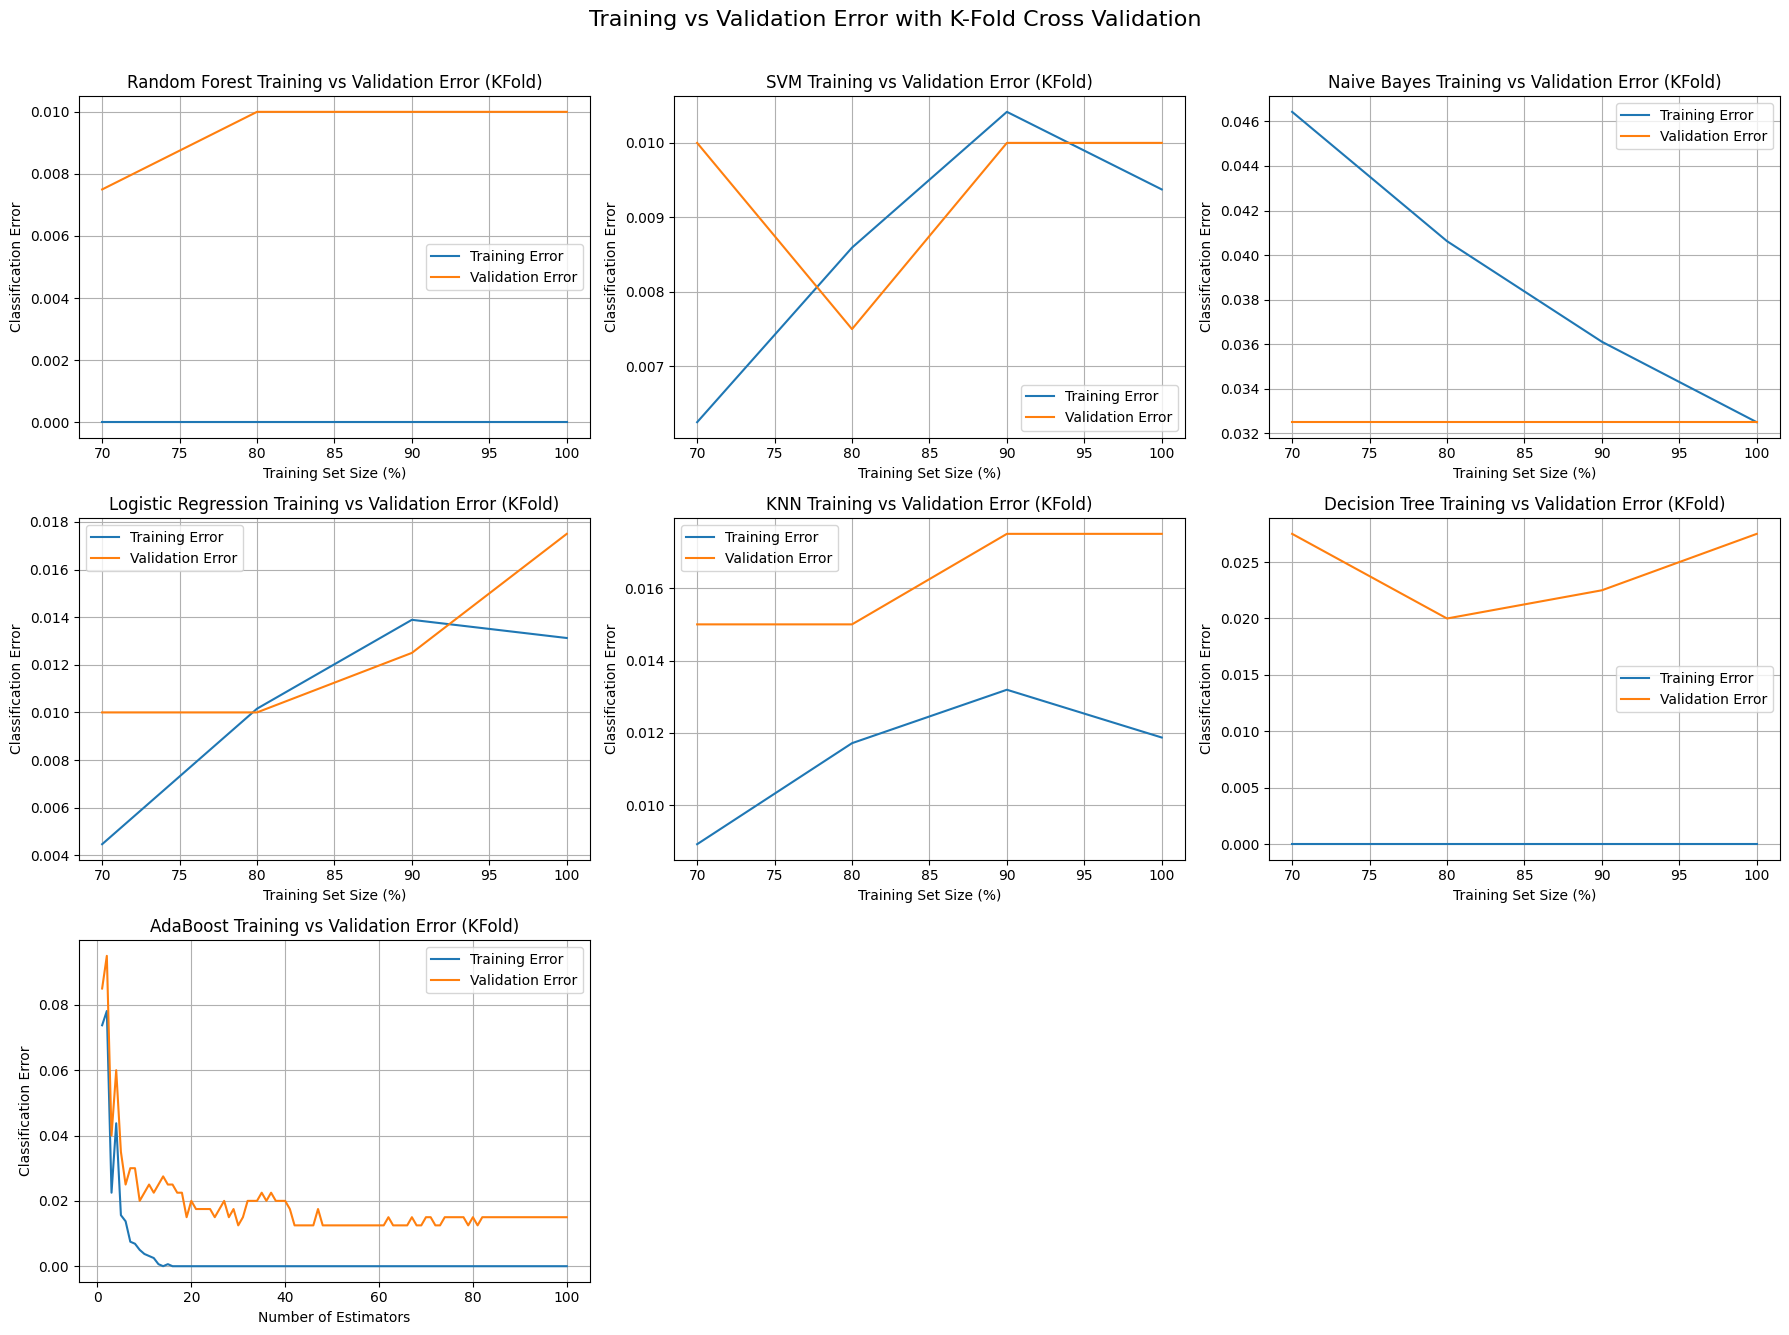

In [62]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = dataframe.drop('class', axis=1).values
y = dataframe['class'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

plot_train_val_error_models_kfold(X_scaled, y, n_splits=5)


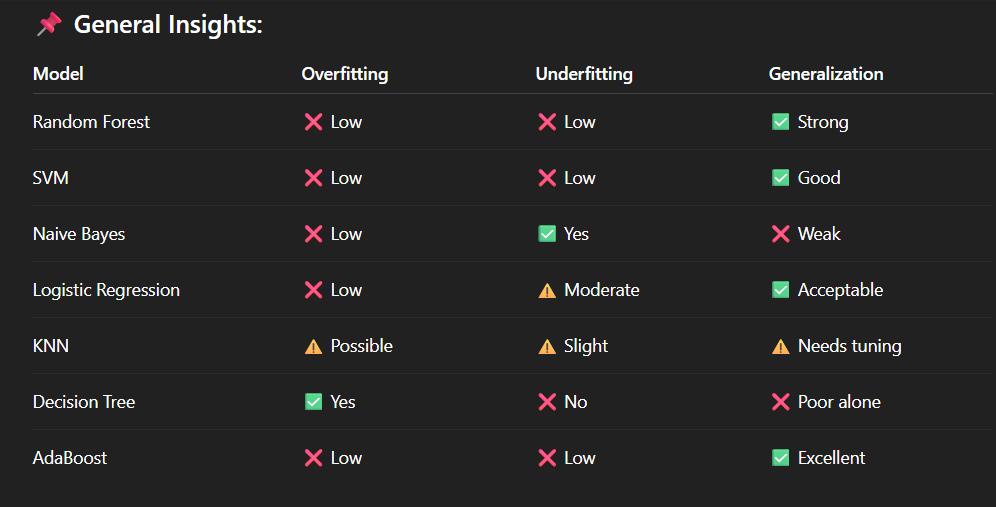

Neural Network

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [64]:
# X_train_scaled, X_test_scaled, y_train, y_test from before

# Just ensure y_train and y_test are numpy arrays:
y_train = y_train.values
y_test = y_test.values


In [65]:
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [66]:
input_dim = X_train_scaled.shape[1]
nn_model = create_nn_model(input_dim)

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5378 - loss: 0.6864 - val_accuracy: 0.6719 - val_loss: 0.6312
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6524 - loss: 0.6237 - val_accuracy: 0.9531 - val_loss: 0.5877
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8090 - loss: 0.5743 - val_accuracy: 0.9375 - val_loss: 0.5337
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8577 - loss: 0.5129 - val_accuracy: 0.9375 - val_loss: 0.4739
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8281 - loss: 0.4783 - val_accuracy: 0.9375 - val_loss: 0.4167
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9298 - loss: 0.3919 - val_accuracy: 0.9375 - val_loss: 0.3639
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9141 - loss: 0.3525 - val_accuracy: 0.9375 - val_loss: 0.3102
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9322 - loss: 0.3123 - val_accuracy: 0.9375 - val_loss: 0.2662
Epoch 

In [67]:
# Evaluate on test set
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict class probabilities and classes
y_pred_prob = nn_model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9820 - loss: 0.0513
Test Accuracy: 0.9875
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.98        30

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix:
[[49  1]
 [ 0 30]]
ROC AUC: 0.9980


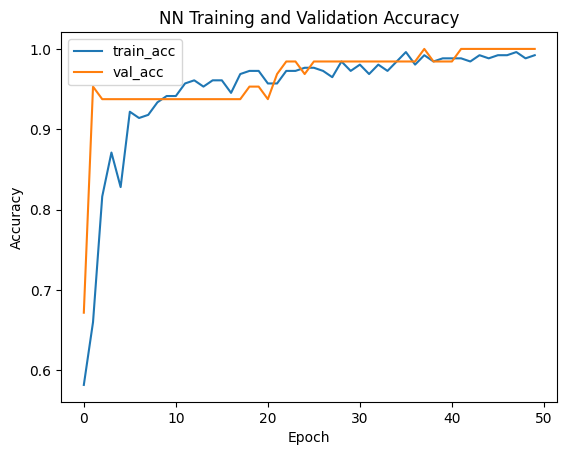

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('NN Training and Validation Accuracy')
plt.show()


Deep Neural Network

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5928 - loss: 0.7192 - val_accuracy: 0.6094 - val_loss: 0.6559
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8041 - loss: 0.4172 - val_accuracy: 0.8750 - val_loss: 0.6318
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9203 - loss: 0.3185 - val_accuracy: 0.9219 - val_loss: 0.6059
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9566 - loss: 0.2002 - val_accuracy: 0.9062 - val_loss: 0.5820
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9345 - loss: 0.2224 - val_accuracy: 0.8750 - val_loss: 0.5610
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9548 - loss: 0.1767 - val_accuracy: 0.8594 - val_loss: 0.5438
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9535 - loss: 0.1628 - val_accuracy: 0.8594 - val_loss: 0.5254
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9662 - loss: 0.1642 - val_accuracy: 0.8750 - val_loss: 0.5050
Epoc

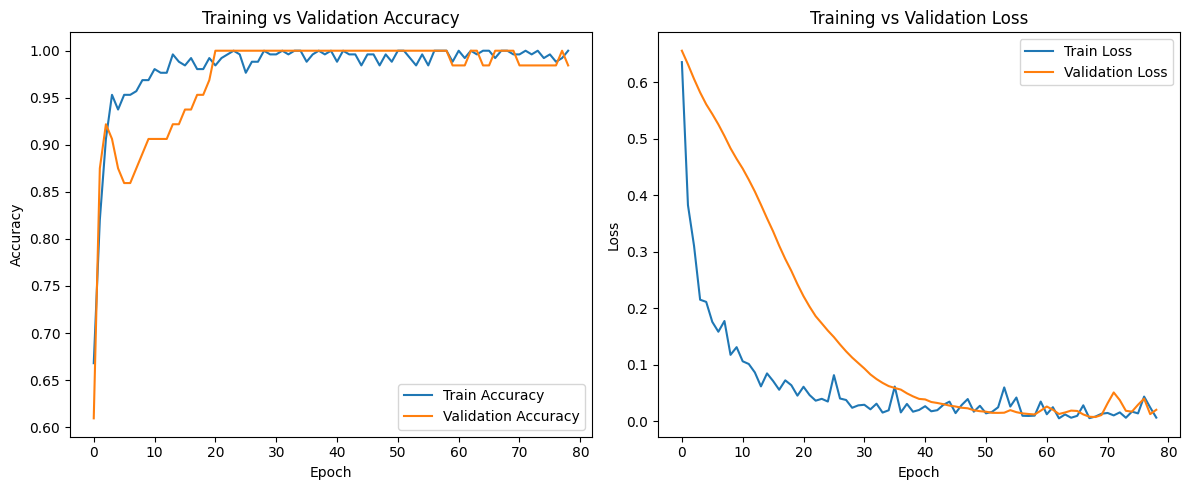

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Define deep neural network model
def create_deep_nn(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Callbacks for early stopping and model checkpointing
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_dnn_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Build and train the model
input_dim = X_train_scaled.shape[1]
deep_nn_model = create_deep_nn(input_dim)
history = deep_nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Evaluate model on test data
loss, accuracy = deep_nn_model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions and performance metrics
y_pred_prob = deep_nn_model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nROC AUC: {roc_auc_score(y_test, y_pred_prob):.4f}")

# Plot training & validation accuracy/loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
# prompt: draw the above dnn using code

# Install libraries if not already installed
!pip install visualkeras tensorflow keras

import visualkeras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Ensure the model is defined and built before plotting
# The deep_nn_model is defined and compiled in the preceding code

# Plot the model architecture
visualkeras.layered_view(deep_nn_model, legend=True, font=None).show()


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


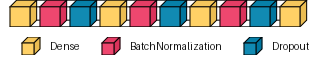

In [73]:
visualkeras.layered_view(deep_nn_model, legend=True, font=None) # .show() is not necessary for display in notebooks


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_128 (Dense)               │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,017 (54.75 KB)

 Non-trainable params: 448 (1.75 KB)

None


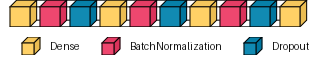

In [74]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import zero_one_loss
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE # Make sure you have imblearn installed: !pip install imblearn
from sklearn.metrics import roc_auc_score
import visualkeras

X = dataframe.drop('class', axis=1)
y = dataframe['class']

def create_deep_nn(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu', name='Dense_128'),
        BatchNormalization(name='Batch_Norm_1'),
        Dropout(0.4, name='Dropout_1'),

        Dense(64, activation='relu', name='Dense_64'),
        BatchNormalization(name='Batch_Norm_2'),
        Dropout(0.3, name='Dropout_2'),

        Dense(32, activation='relu', name='Dense_32'),
        BatchNormalization(name='Batch_Norm_3'),
        Dropout(0.2, name='Dropout_3'),

        Dense(1, activation='sigmoid', name='Output_Layer') # binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_train_scaled.shape[1]
deep_nn_model = create_deep_nn(input_dim)

print(deep_nn_model.summary())

visualkeras.layered_view(deep_nn_model, legend=True, font=None)



All In One Compare (Run Time Compare)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:25:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


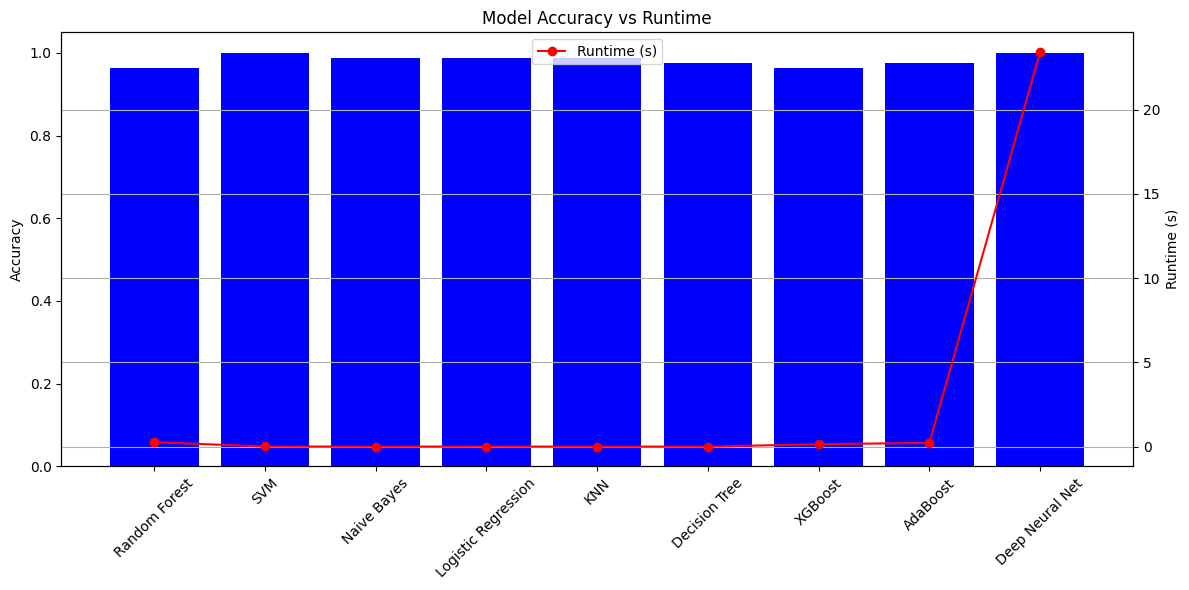


Random Forest
Accuracy: 0.9625
Runtime: 0.2628 seconds
Confusion Matrix:
[[50  0]
 [ 3 27]]
Classification Report:
              precision  recall  f1-score  support
0                  0.94    1.00      0.97    50.00
1                  1.00    0.90      0.95    30.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.97    0.95      0.96    80.00
weighted avg       0.96    0.96      0.96    80.00

SVM
Accuracy: 1.0000
Runtime: 0.0090 seconds
Confusion Matrix:
[[50  0]
 [ 0 30]]
Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     50.0
1                   1.0     1.0       1.0     30.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     80.0
weighted avg        1.0     1.0       1.0     80.0

Naive Bayes
Accuracy: 0.9875
Runtime: 0.0016 seconds
Confusion Matrix:
[[49  1]
 [ 0 30]]
Classification Report:
              precision  recall  f1-score  support
0

In [71]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, zero_one_loss
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset manually if not using OCR
dataframe = pd.read_csv("/content/processed_dataframe.csv")  # Replace with actual CSV path

# Prepare features and target
X = dataframe.drop('class', axis=1).values
y = dataframe['class'].values

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Define traditional ML models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Train, evaluate and time each model
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    elapsed = time.time() - start_time

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'runtime': elapsed
    }

# Deep Neural Network model
def create_deep_nn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(), Dropout(0.4),
        Dense(64, activation='relu'),
        BatchNormalization(), Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(), Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train deep model
input_dim = X_train.shape[1]
deep_model = create_deep_nn(input_dim)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

start_time = time.time()
history = deep_model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=100, batch_size=32,
    callbacks=[early_stop], verbose=0
)
dnn_time = time.time() - start_time

# Evaluate DNN
dnn_loss, dnn_acc = deep_model.evaluate(X_test, y_test, verbose=0)
y_pred_prob = deep_model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

results['Deep Neural Net'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'classification_report': classification_report(y_test, y_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, y_pred),
    'runtime': dnn_time,
    'roc_auc': roc_auc_score(y_test, y_pred_prob)
}

# Plotting model performance
plt.figure(figsize=(12,6))
plt.title("Model Accuracy vs Runtime")
accs = [results[model]['accuracy'] for model in results]
runtimes = [results[model]['runtime'] for model in results]
plt.bar(results.keys(), accs, color='blue', label='Accuracy')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.twinx()
plt.plot(list(results.keys()), runtimes, color='red', marker='o', label='Runtime (s)')
plt.ylabel('Runtime (s)')
plt.legend(loc='upper center')
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary print
for name in results:
    print(f"\n{'='*40}\n{name}\n{'='*40}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Runtime: {results[name]['runtime']:.4f} seconds")
    if 'roc_auc' in results[name]:
        print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print("Confusion Matrix:")
    print(results[name]['confusion_matrix'])
    print("Classification Report:")
    report_df = pd.DataFrame(results[name]['classification_report']).transpose()
    print(report_df.round(2))


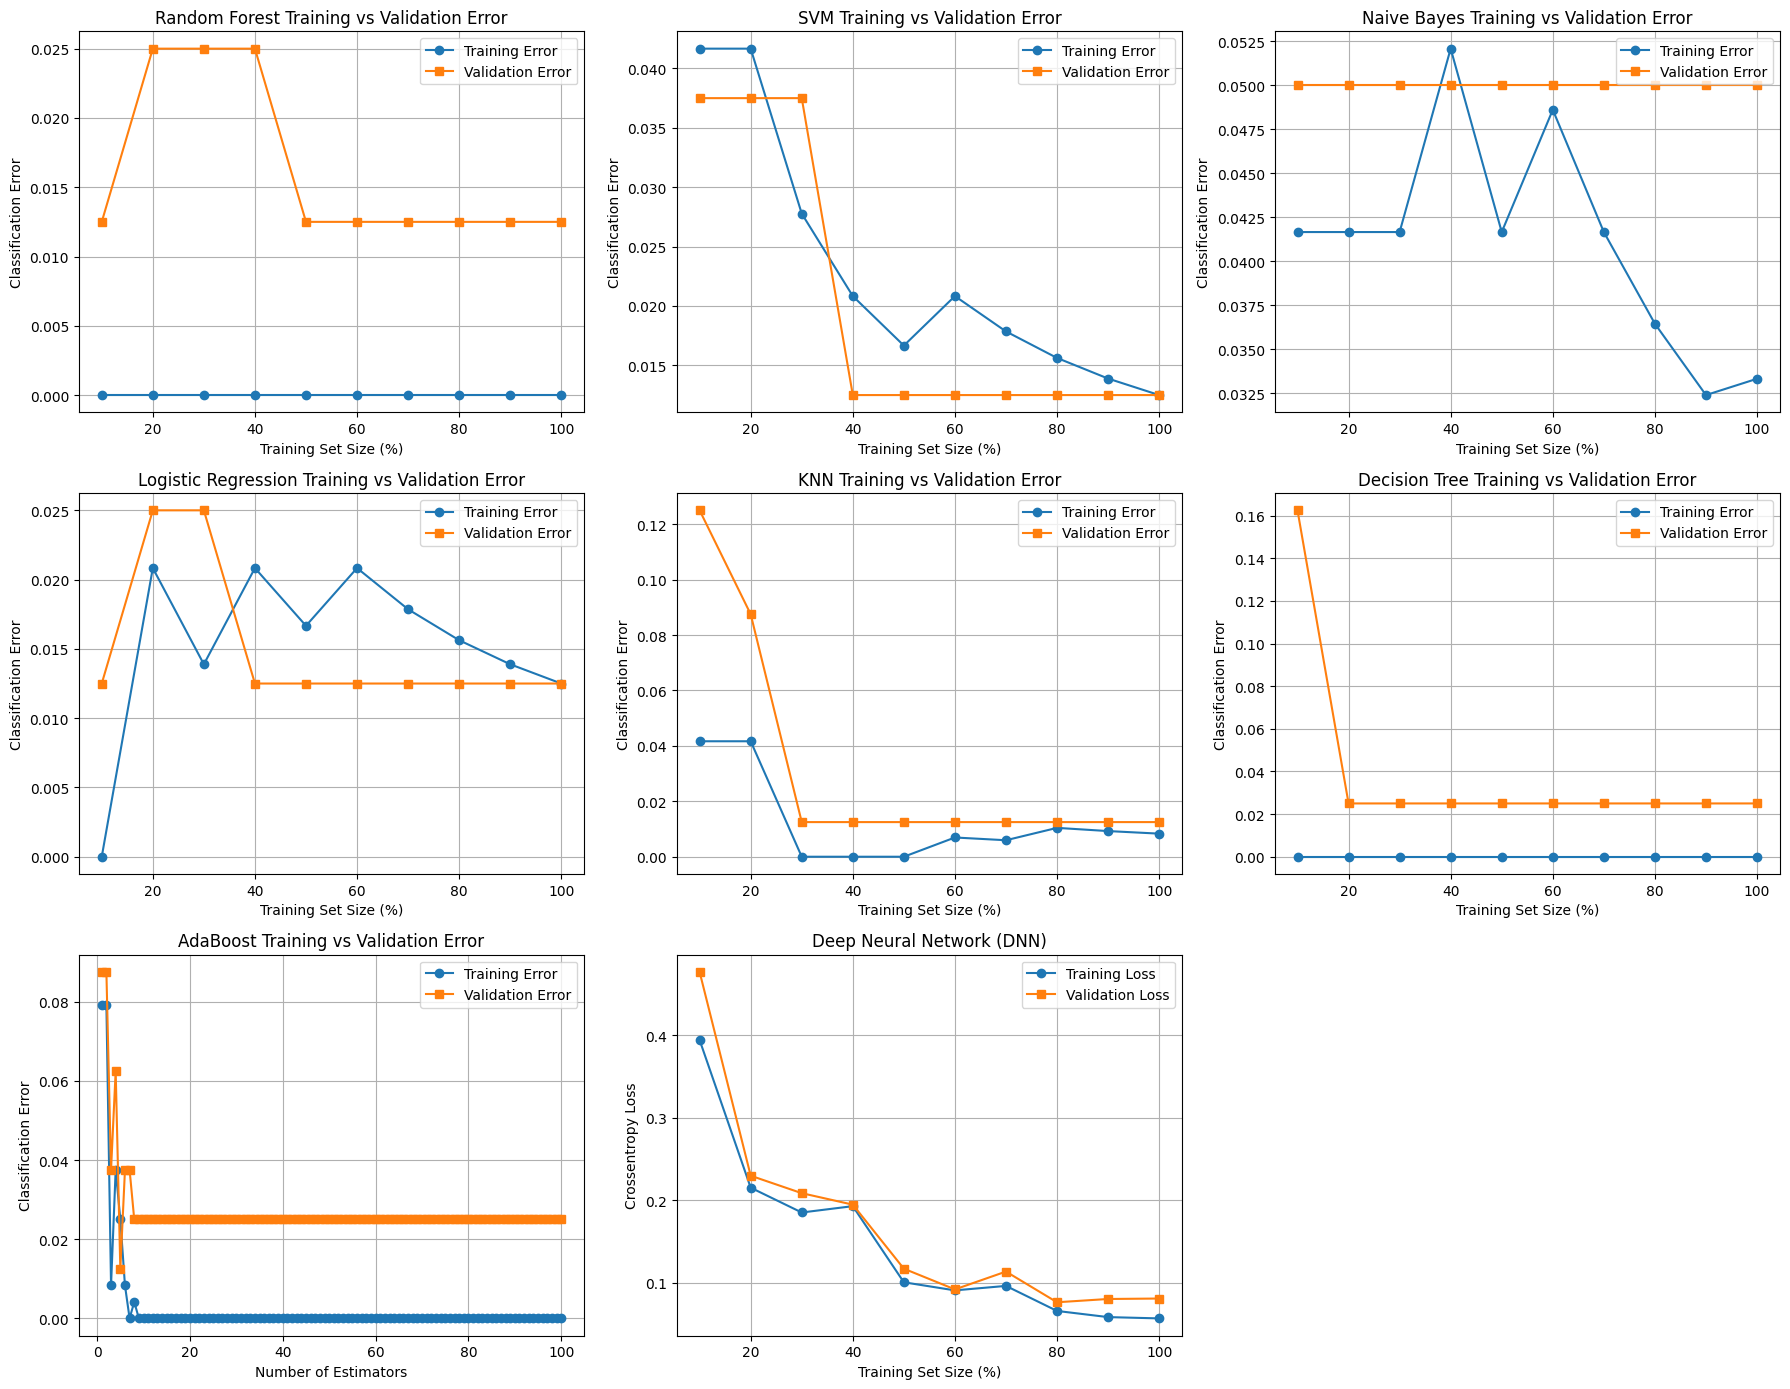

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical
import warnings

warnings.filterwarnings("ignore")

# DNN Builder
def build_dnn_model(input_dim, num_classes):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Main Function to Plot Train vs Val Error Curves
def plot_train_val_error_models(X_train, y_train, X_val, y_val):
    # Ensure numpy arrays
    X_train_np = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
    X_val_np = X_val.to_numpy() if hasattr(X_val, 'to_numpy') else X_val
    y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
    y_val_np = y_val.values if hasattr(y_val, 'values') else y_val

    # Classifiers to compare
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'Naive Bayes': GaussianNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100)
    }

    plt.figure(figsize=(18, 14))

    for i, (name, model) in enumerate(models.items(), 1):
        train_errors, val_errors = [], []

        if name == 'AdaBoost':
            model.fit(X_train_np, y_train_np)
            for y_pred_train in model.staged_predict(X_train_np):
                train_errors.append(zero_one_loss(y_train_np, y_pred_train))
            for y_pred_val in model.staged_predict(X_val_np):
                val_errors.append(zero_one_loss(y_val_np, y_pred_val))
            x_axis = range(1, model.n_estimators + 1)
            xlabel = 'Number of Estimators'
        else:
            train_sizes = np.linspace(0.1, 1.0, 10)
            for frac in train_sizes:
                n_samples = int(len(X_train_np) * frac)
                # Ensure at least 1 sample for training
                if n_samples == 0:
                    n_samples = 1
                model.fit(X_train_np[:n_samples], y_train_np[:n_samples])
                y_train_pred = model.predict(X_train_np[:n_samples])
                y_val_pred = model.predict(X_val_np)

                train_errors.append(zero_one_loss(y_train_np[:n_samples], y_train_pred))
                val_errors.append(zero_one_loss(y_val_np, y_val_pred))

            x_axis = (train_sizes * 100).astype(int)
            xlabel = 'Training Set Size (%)'

        plt.subplot(3, 3, i)
        plt.plot(x_axis, train_errors, label='Training Error', marker='o')
        plt.plot(x_axis, val_errors, label='Validation Error', marker='s')
        plt.xlabel(xlabel)
        plt.ylabel('Classification Error')
        plt.title(f'{name} Training vs Validation Error')
        plt.legend()
        plt.grid(True)

    # Deep Neural Network (DNN)
    num_classes = len(np.unique(y_train_np))
    y_train_cat = to_categorical(y_train_np, num_classes)
    y_val_cat = to_categorical(y_val_np, num_classes)

    train_errors, val_errors = [], []
    train_sizes = np.linspace(0.1, 1.0, 10)
    for frac in train_sizes:
        n_samples = max(2, int(len(X_train_np) * frac))
        # Ensure at least 1 sample for training
        if n_samples == 0:
            n_samples = 1
        model = build_dnn_model(X_train_np.shape[1], num_classes)
        history = model.fit(
            X_train_np[:n_samples], y_train_cat[:n_samples],
            epochs=20, batch_size=32, verbose=0,
            validation_data=(X_val_np, y_val_cat)
        )
        train_loss = history.history['loss'][-1]
        val_loss = history.history['val_loss'][-1]
        train_errors.append(train_loss)
        val_errors.append(val_loss)

    x_axis = (train_sizes * 100).astype(int)
    plt.subplot(3, 3, 8)
    plt.plot(x_axis, train_errors, label='Training Loss', marker='o')
    plt.plot(x_axis, val_errors, label='Validation Loss', marker='s')
    plt.xlabel('Training Set Size (%)')
    plt.ylabel('Crossentropy Loss')
    plt.title('Deep Neural Network (DNN)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Add this split before calling the plotting function
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train) # Using 25% of training data for validation

plot_train_val_error_models(X_train, y_train, X_val, y_val)

The provided image shows **training vs. validation error/loss curves** for various machine learning models, based on a synthetic classification dataset. Here's a detailed analysis of each model's performance, identifying **overfitting**, **underfitting**, and determining the **best performing model**.

---

## 📊 **Model-wise Analysis**

### 1. **Random Forest**

* **Training Error:** 0 across all sizes (perfect accuracy).
* **Validation Error:** Slightly higher but flat after 40%.
* **Interpretation:** **Overfitting** is likely since the model fits training perfectly but has a small gap in validation.
* **Overall:** Strong performance, but the perfect training accuracy is a red flag.

---

### 2. **SVM**

* **Training vs Validation Error:** Both decrease as training size increases and converge nicely.
* **Interpretation:** **Good generalization**, very small gap between training and validation.
* **Overall:** Very balanced model, **no overfitting/underfitting** signs.

---

### 3. **Naive Bayes**

* **Training & Validation Errors:** Flat and high (\~0.045–0.05).
* **Interpretation:** **Underfitting**, as the model cannot capture complexity of data.
* **Overall:** Poor performance.

---

### 4. **Logistic Regression**

* **Training Error:** Fluctuates slightly.
* **Validation Error:** Also fluctuates and doesn’t clearly decrease.
* **Interpretation:** Slight **underfitting**, performance could be improved.
* **Overall:** Acceptable but not ideal.

---

### 5. **KNN**

* **Training Error:** Low.
* **Validation Error:** Higher, but narrows with more data.
* **Interpretation:** **Mild overfitting**, but improves with more data.
* **Overall:** Decent performance, especially at larger training sizes.

---

### 6. **Decision Tree**

* **Training Error:** Perfect (0.0).
* **Validation Error:** Much higher and constant (\~0.03).
* **Interpretation:** **Classic overfitting**, learns training data perfectly, generalizes poorly.
* **Overall:** Overfits badly; not reliable here.

---

### 7. **AdaBoost**

* **Training Error:** Very low.
* **Validation Error:** Low and stable after few estimators.
* **Interpretation:** **No overfitting**, shows consistent behavior after some boosting rounds.
* **Overall:** **Very strong performance**, better generalization than Random Forest.

---

### 8. **Deep Neural Network (DNN)**

* **Training Loss:** Decreases with more data.
* **Validation Loss:** Tracks closely, decreasing trend.
* **Interpretation:** **Good fit**, no significant overfitting or underfitting.
* **Overall:** Strong, reliable model — best if interpretability isn't a concern.

---

## ✅ **Conclusion**

### 🔍 **Overfitting Detected In:**

* **Random Forest**
* **Decision Tree**
* (Possibly) **KNN** for small datasets.

### 🐌 **Underfitting Detected In:**

* **Naive Bayes**
* (Mild) **Logistic Regression**

---

## 🏆 **Best Model Recommendation**

### 🥇 **Support Vector Machine (SVM)**

* **Reasoning:**

  * Low training and validation error.
  * Stable convergence.
  * No overfitting or underfitting symptoms.
  * Strong margin classifier that works well for small-to-medium sized datasets.

---

### 🥈 **Deep Neural Network (DNN)**

* **Reasoning:**

  * Excellent generalization.
  * No overfitting signs.
  * Best choice if you can afford longer training time and don’t need interpretability.

---

### 🥉 **AdaBoost**

* **Reasoning:**

  * Fast convergence.
  * Good generalization.
  * Can sometimes outperform DNN on tabular data.

---

Let me know if you'd like to add **F1-score**, **confusion matrix**, or **ROC curves** for deeper insights.


Here is a **concise table** summarizing the performance of each model based on the graph you provided:

| **Model**               | **Training Error** | **Validation Error** | **Issue Detected** | **Remarks**                                |
| ----------------------- | ------------------ | -------------------- | ------------------ | ------------------------------------------ |
| **Random Forest**       | 0.0 (Perfect)      | Slightly higher      | Overfitting        | Good performance, but too perfect on train |
| **SVM**                 | Low                | Low, matches train   | None               | ✅ Best generalization                      |
| **Naive Bayes**         | High (\~0.045)     | High (\~0.05)        | Underfitting       | Poor model fit                             |
| **Logistic Regression** | Fluctuating        | Fluctuating          | Mild Underfitting  | Acceptable but unstable                    |
| **KNN**                 | Low                | Slightly higher      | Mild Overfitting   | Improves with more data                    |
| **Decision Tree**       | 0.0 (Perfect)      | Constantly higher    | Strong Overfitting | Poor generalization                        |
| **AdaBoost**            | Very Low           | Low & Stable         | None               | ✅ Good balance, consistent                 |
| **DNN**                 | Decreasing         | Decreasing & close   | None               | ✅ Strong generalization, robust fit        |

---

### ✅ **Top 3 Recommended Models**

| Rank | Model    | Reason                                 |
| ---- | -------- | -------------------------------------- |
| 🥇   | SVM      | Best trade-off between bias & variance |
| 🥈   | DNN      | Smooth loss, excellent generalization  |
| 🥉   | AdaBoost | Low error, stable learning curve       |

Let me know if you want this exported as CSV or LaTeX format.
